# Solving LunarLander-v2 with Tabular, Deep-Q Network and Policy Gradient Methods (Demo)
*  ## Group members:
   *  Mengyang Liu
   *  Xiaoyao Guo
   *  Yanan Wang

## Table of Content: <a class="anchor" id="TOC"></a>
* This table of content only works for offline.
* If this is opened on Colab, consider the generated table of content on the left.

<br>

### [Initialize and Setting up Environment](#ENV)
* [Initialization](#init)

<br>

### [Deep-Q Network](#DQN)
* [Update rule in DQN](#update)
* [DQN Pseudo-code](#code)
* [Static hyperparameters](#static)
* [DQN class](#class)
* [Grid Search](#grid)
* [Setting up and train DQN](#train)

<br>

### [Results](#Result)
* [Visualization of the resulting model](#visual)
* [Compare performances between DQN in different training period](#clips)

<br>

### [Conclusion](#conc)

## Initialize and Setting up Environment  <a class="anchor" id="ENV"></a>

<br>

*   [To Table of Contents](#TOC)

### Initialization <a class="anchor" id="init"></a>
*  TensorFlow is used as our deep learning library.
*  One custom packages are used:
   *  **"custom_animation.py"**: we only use method `animate_one_episode(env, policy)` to play one episode of LunarLander by the given policy and show the animation.
      *  Require `matplotlib` and `opencv-python`.

In [1]:
%matplotlib notebook
import numpy as np
import gym
import tensorflow as tf

# Ignore deprecation warnings:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualization
from IPython.display import HTML
import matplotlib.pyplot as plt

# If running on Colab, we need to specify the path of this notebook
import sys
if "google.colab" in sys.modules:
    # Set this to the directory of this file in Google Drive
    notebook_path = '/content/drive/MyDrive/CISC 474/code' 
    sys.path.append(notebook_path)
    sys.path.append(notebook_path+'/models')
    sys.path.append(notebook_path+'/models/clips')
    from google.colab import files
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = notebook_path
else:
    root_path = '.'
    
# Custom package
import custom_animation as ani

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*  See if GPU is available

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
pip install gym[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*   Run the following code if not on Colab for visualization.

In [4]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


*  Set up LunarLander-v2 environment.

In [5]:
env = gym.make(
    "LunarLander-v2",
    continuous = False,
    gravity = -10.0,
    enable_wind = False,
    wind_power = 15.0,
    turbulence_power = 1.5,
)

*  Set up a `Demo` class for imported Tensorflow models.

In [6]:
class Demo:
  def __init__(self, model):
    self.model = model
  def predict(self, obs):
    # Works for both DQN and REINFORCE
    return self.model.predict(obs[np.newaxis],verbose=0)[0].argmax()

## SARSA and Q-learning(Failed)
*  Q-tables are high dimensional arrays so it they are hard to save.
*  We saved one example for each of the 4 set ups(SARSA/Q-learning + Uniform/Manual discretization).
  *  Check out folder `videos_visualizations_for_tabular_TDControl`
*  Experiemental results show that they did not work well.

## REINFORCE(Failed)

In [7]:
reinforce = Demo(tf.keras.models.load_model(root_path+'/models/REINFORCE.h5'))
anim = ani.animate_one_episode(env, reinforce)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

## DQN(Succeeded)

### Best models

*   Best model in 1600 episode training(overall best):

In [8]:
best_1600 = Demo(tf.keras.models.load_model(root_path+'/models/ffdqn_1600_best.h5'))
anim = ani.animate_one_episode(env, best_1600)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

*  Best model in 1800 episodes training:

In [9]:
best_1800 = Demo(tf.keras.models.load_model(root_path+'/models/ffdqn_1800_best.h5'))
anim = ani.animate_one_episode(env, best_1800)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

### Clips of models in the training process:
*  We have shown the below figure in our report:

<br>

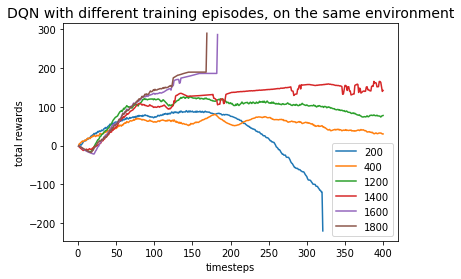
*  Here are the animation of these model behaviors.

*  200 episode training:
  *  We can see that the lander goes out side of the viewpoint and received -100 points at the termination state.

In [10]:
ffdqn_200 = Demo(tf.keras.models.load_model(root_path+'/models/clips/ffdqn_200.h5'))
anim = ani.animate_one_episode(env, ffdqn_200, seed=40)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

*  400 episode training:
  *  We can see that the lander floats above the surface and lasted for all 400 timesteps.

In [11]:
ffdqn_400 = Demo(tf.keras.models.load_model(root_path+'/models/clips/ffdqn_400.h5'))
anim = ani.animate_one_episode(env, ffdqn_400, seed=40)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

*  1200 episode training:
  *  We can see that the behavior is similar to that of the 400 episode policy.
  *  Not much improvements on policy are made in episodes 400-1200.

In [12]:
ffdqn_1200 = Demo(tf.keras.models.load_model(root_path+'/models/clips/ffdqn_1200.h5'))
anim = ani.animate_one_episode(env, ffdqn_1200, seed=40)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

*  1400 episode training:
  *  We can see that the lander lands, but not on the landing pad.
  *  The lander starts to learn to land instead of floating till the end of timestep 400.

In [13]:
ffdqn_1400 = Demo(tf.keras.models.load_model(root_path+'/models/clips/ffdqn_1400.h5'))
anim = ani.animate_one_episode(env, ffdqn_1400, seed=40)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

*  1600 episode training:
  *  The lander smoothly and successfully land on the landing pad, receiving +200 points.

In [14]:
ffdqn_1600 = Demo(tf.keras.models.load_model(root_path+'/models/clips/ffdqn_1600.h5'))
anim = ani.animate_one_episode(env, ffdqn_1600, seed=40)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

*  1800 episode training:
  *  The lander also lands successfully and received +200 points, but the landing is harder than that in 1600 episode.
  *  The agent starts to learn to land faster, but this also causes instabilities.

In [15]:
ffdqn_1800 = Demo(tf.keras.models.load_model(root_path+'/models/clips/ffdqn_1800.h5'))
anim = ani.animate_one_episode(env, ffdqn_1800, seed=40)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>